In [31]:
#importing libraries
import pandas as pd
import glob
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#usuing glob to grab all csv files which start with the word 'data'
datasets = sorted(glob.glob('data*.csv'))
print(datasets)

['data-01.csv', 'data-02.csv', 'data-03.csv', 'data-04.csv']


## Loading the datasets

In [33]:
#loading datasets
def load_dataset(dataset):
    df= pd.read_csv(dataset, header= None)
    return df

## Function for identifying issues

In [34]:
def issue_identification(df):
    
    #If max of Feature #0=0 AND max of Feature #20=20
    #Print 'I doubt the integrity of this dataset'
    i = df.max()
    if (i[0]==0.0) and (i[20]==20.0):
        print("I doubt the integrity of this dataset")
      
    
    #If the first condition isn't true
    #Check whether sum of min of all features = 0
    #Print 'Why is this happening?' if true
    else:
        x = 0
        for y in df.min():
            x+=y
        if x==0:
            print("Why is this happening?")
      
    
    #If both conditions are false, print 'Dataset looks good'
        else:
            print("Dataset looks good")

## Function for visualizing Average, Maximum, Minimum

In [35]:
def visualize(df):
    #creating multiple lists to append to main Dataframe
    f_avg = df.mean().tolist()
    f_max = df.max().tolist()
    f_min = df.min().tolist()
    
    #Creating main Dataframe with Feature, Average, Maximum, Minimum columns
    df_viz = pd.DataFrame(columns=['Features', 'Avg', 'Max', 'Min'])
    df_viz['Feature'] = df.columns
    df_viz['Avg'] = f_avg
    df_viz['Max'] = f_max
    df_viz['Min'] = f_min
    
    #Plotting each column against Feature
    plt.plot(df_viz['Feature'], df_viz['Max'] ,"-r", label="Maxumum")
    plt.plot(df_viz['Feature'], df_viz['Min'] ,"-g", label="Minimum")
    plt.plot(df_viz['Feature'], df_viz['Avg'],"-b", label="Average")
    
    #Assigning lables and legend
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.legend(loc="upper left")
    plt.show() 

## Running the functions

data-01.csv


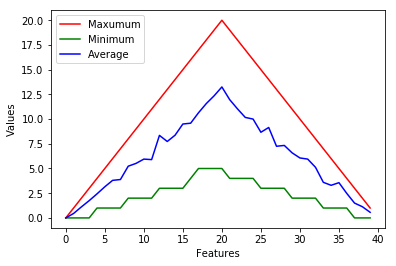

I doubt the integrity of this dataset


data-02.csv


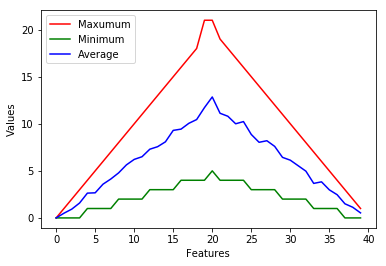

Dataset looks good


data-03.csv


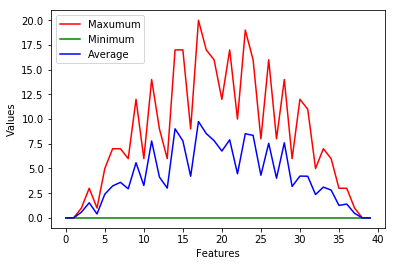

Why is this happening?


data-04.csv


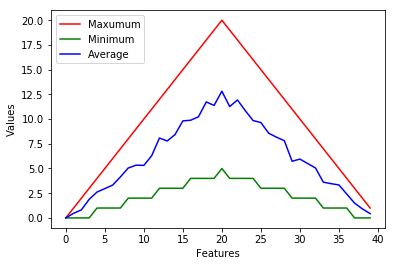

I doubt the integrity of this dataset




In [36]:
#Running the functions in a for loop for every csv file
for dataset in datasets[:4]:
    print(dataset)
    df = load_dataset(dataset)
    visualize(df)
    issue_identification(df)
    print('\n')